#  Tasks
### Find the vehicles that travel for 4 hours straight
### 30 mins break is not considered a rest
### Find the location where the vehicle should stop according to the rules

In [356]:
import pandas as pd
import numpy as np
import datetime
import glob
from datetime import date
# Load the data file
#df = pd.read_csv(r"C:\Users\ASUS\Desktop\2019-11-01_00.csv")
path =r'C:\Users\ASUS\Desktop\2019-11*zip' # use your path
allFiles = glob.glob(path)
list_ = []
for file_ in allFiles:
    df_file = pd.read_csv(file_, compression='zip')
    #df = df[df['unit_type'].between(5.0, 9.0)]
    list_.append(df_file)
df = pd.concat(list_).reset_index(drop=True)

In [357]:
import datetime
# check if its weekday
# today = datetime.datetime(2019, 11, 1)
# datetime.datetime.today(2019, 11, 1).weekday() 
day = pd.Timestamp("2019-11-01")
print(day.dayofweek)

# start from 0 == Monday 1= Tuesday,2 = Wednesday,3 =thursday, 4 = Friday

4


In [358]:
# Check some of the rows
df.head()

,time_stamp,unit_id,lat,lon,speed,unit_type
0,2019-11-01 00:00:32,005000800000868998037270218,15.461530,100.132940,0,8.0
1,2019-11-01 00:00:54,005000800000868998030016048,14.904580,101.982160,0,8.0
2,2019-11-01 00:00:29,005000800000868998035589304,13.574090,100.331940,0,9.0
3,2019-11-01 00:00:30,0390002000000000000EE089213,6.887403,99.804967,0,8.0
4,2019-11-01 00:00:59,005000800000868998037264815,13.525250,100.281400,0,9.0


In [359]:
df['geohash'] = df["lat"].round(1).astype(str) + "-" + df["lon"].round(1).astype(str)

In [360]:
df = df.drop(['lat','lon'],axis=1)

In [362]:
df.head()

,time_stamp,unit_id,speed,unit_type,geohash
0,2019-11-01 00:00:32,005000800000868998037270218,0,8.0,15.5-100.1
1,2019-11-01 00:00:54,005000800000868998030016048,0,8.0,14.9-102.0
2,2019-11-01 00:00:29,005000800000868998035589304,0,9.0,13.6-100.3
3,2019-11-01 00:00:30,0390002000000000000EE089213,0,8.0,6.9-99.8
4,2019-11-01 00:00:59,005000800000868998037264815,0,9.0,13.5-100.3


In [363]:
df['time_stamp']=pd.to_datetime(df['time_stamp'])

In [364]:
df.head()

,time_stamp,unit_id,speed,unit_type,geohash
0,2019-11-01 00:00:32,005000800000868998037270218,0,8.0,15.5-100.1
1,2019-11-01 00:00:54,005000800000868998030016048,0,8.0,14.9-102.0
2,2019-11-01 00:00:29,005000800000868998035589304,0,9.0,13.6-100.3
3,2019-11-01 00:00:30,0390002000000000000EE089213,0,8.0,6.9-99.8
4,2019-11-01 00:00:59,005000800000868998037264815,0,9.0,13.5-100.3


In [365]:
# filter out the unit type 5-9
df_filtered = df[df['unit_type'].between(5.0, 9.0)]
df_sorted = df_filtered.sort_values(by=['time_stamp'])

In [366]:
#Drop unncessary columns
df_dropped = df_sorted.drop(['unit_type'], axis = 1) 

In [367]:
# groupby the unit_id and make it into the dataframe of lists
# df_list = df_dropped.groupby('unit_id').agg(lambda x: x.tolist())
# df_list
df_list = df_dropped.groupby('unit_id').agg(lambda x: x.tolist())
df_list.head()

,time_stamp,speed,geohash
unit_id,,,
001000000000000100410113011,"[2019-11-01 00:08:42, 2019-11-01 00:08:42, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[13.6-100.8, 13.6-100.8, 13.6-100.8, 13.6-100...."
001000000000000100750101924,"[2019-11-01 01:24:34, 2019-11-01 01:45:11, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[18.8-99.0, 18.8-99.0, 18.8-99.0, 18.8-99.0, 1..."
001000000000000101680100219,"[2019-11-01 00:31:04, 2019-11-01 00:53:00, 201...","[52, 59, 59, 59, 59, 53, 47, 41, 41, 40, 70, 6...","[17.8-99.3, 17.7-99.2, 17.7-99.2, 17.7-99.2, 1..."
001000000000000101680100320,"[2019-11-01 00:09:25, 2019-11-01 00:09:25, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[13.5-100.8, 13.5-100.8, 13.5-100.8, 13.5-100...."
001000000000000102651102018,"[2019-11-01 00:05:15, 2019-11-01 00:05:15, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[13.9-100.5, 13.9-100.5, 13.9-100.5, 13.9-100...."


In [368]:
# Create the column named sum to sum up the values of speed
df_list['sum'] = df_list['speed'].apply(lambda x:sum(x))
df_list.head()

,time_stamp,speed,geohash,sum
unit_id,,,,
001000000000000100410113011,"[2019-11-01 00:08:42, 2019-11-01 00:08:42, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[13.6-100.8, 13.6-100.8, 13.6-100.8, 13.6-100....",0
001000000000000100750101924,"[2019-11-01 01:24:34, 2019-11-01 01:45:11, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[18.8-99.0, 18.8-99.0, 18.8-99.0, 18.8-99.0, 1...",0
001000000000000101680100219,"[2019-11-01 00:31:04, 2019-11-01 00:53:00, 201...","[52, 59, 59, 59, 59, 53, 47, 41, 41, 40, 70, 6...","[17.8-99.3, 17.7-99.2, 17.7-99.2, 17.7-99.2, 1...",1913
001000000000000101680100320,"[2019-11-01 00:09:25, 2019-11-01 00:09:25, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[13.5-100.8, 13.5-100.8, 13.5-100.8, 13.5-100....",0
001000000000000102651102018,"[2019-11-01 00:05:15, 2019-11-01 00:05:15, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[13.9-100.5, 13.9-100.5, 13.9-100.5, 13.9-100....",0


In [369]:
# Only select the rows where the sum of speed is greater than 0
df_list =df_list[df_list['sum'] >0 ]
# Remove the column 'sum'
df_list = df_list.drop(['sum'],axis=1)

In [370]:
df_list.head()

,time_stamp,speed,geohash
unit_id,,,
001000000000000101680100219,"[2019-11-01 00:31:04, 2019-11-01 00:53:00, 201...","[52, 59, 59, 59, 59, 53, 47, 41, 41, 40, 70, 6...","[17.8-99.3, 17.7-99.2, 17.7-99.2, 17.7-99.2, 1..."
001000000000000102651103928,"[2019-11-01 00:03:01, 2019-11-01 00:03:01, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[14.1-100.5, 14.1-100.5, 14.1-100.5, 14.1-100...."
001000000000000102651104121,"[2019-11-01 00:00:01, 2019-11-01 00:00:01, 201...","[63, 63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[14.1-100.5, 14.1-100.5, 14.1-100.5, 14.1-100...."
001000000000000102680207127,"[2019-11-01 01:29:20, 2019-11-01 01:48:24, 201...","[51, 55, 39, 0, 0, 0, 59, 59, 54]","[13.5-101.0, 13.4-101.0, 13.1-101.0, 13.1-101...."
001000000000000102680207329,"[2019-11-01 00:12:54, 2019-11-01 00:12:54, 201...","[0, 0, 51, 51, 51, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[13.6-101.0, 13.6-101.0, 13.6-100.8, 13.6-100...."


In [371]:
#Create the empty lists of violating id and sup to to input timestamp
id_violated = []
sup = []

for row in range(len(df_list)):  #Iterate throught all the rows (each row should represent unique id)
    #Create the empty lists of start_list and stop_list to store the starting and stopping timestamp
    start_list = []
    stop_list = []
    for index in range(len(df_list['speed'][row])): #Iterate through index
        if df_list['speed'][row][index] not in range(0,6) and len(stop_list) == len(start_list) and index!= len(df_list['speed'][row])-1: 
            start_list.append(df_list['time_stamp'][row][index])
        elif df_list['speed'][row][index] not in range(0,6)and len(stop_list) < len(start_list) and index == len(df_list['speed'][row])-1:
            stop_list.append(df_list['time_stamp'][row][index])
        elif df_list['speed'][row][index] in range(0,6) and len(stop_list) < len(start_list):
            stop_list.append(df_list['time_stamp'][row][index])
        else:      
            pass
    if len(start_list) != 0: #only for starting list and stopping list that are not empty
        diff_list  = np.subtract(stop_list,start_list)
        break_time = [] #empty set of breaktime to store the breaking intervals
        for i in range(len(start_list[:-1])):
            brk= start_list[i+1]-stop_list[i] 
            # breaking time is the difference between the i+1 th starting time and the i th stopping time
            break_time.append(brk)
        
        total_time = 0  
        for diff,j in zip(diff_list, break_time): 
            count = 0 # keep track of the index
            # find the element where the traveling interval exceeds 4 hours and the break is less than 30 minutes
            if abs(diff/np.timedelta64(1, 's'))>=4*3600: # or abs(j/np.timedelta64(1, 's'))<30*60:
               # print(df_list.index[row])
                id_violated.append(df_list.index[row]) # append the id that satisfies the condition
                #storing id,starting timestamp and timestamp when vehicle is supposed to break
                sup.append([df_list.index[row],start_list[count],start_list[count]+datetime.timedelta(seconds=4*3600)])
            elif abs(j/np.timedelta64(1, 's'))<30*60:
                    total_time += abs(diff/np.timedelta64(1, 's')) + abs(j/np.timedelta64(1, 's'))
            elif abs(j/np.timedelta64(1, 's'))>=30*60:
                    if total_time >= 4*3600:
                        id_violated.append(df_list.index[row])
                       # print(df_list['time_stamp'][count])
                        sup.append([df_list.index[row],start_list[count],start_list[count]+datetime.timedelta(seconds=4*3600)])
                    else:
                        pass
            else:
                pass
            count += 1
            
    else: 
        pass


In [373]:
res = pd.DataFrame(sup,columns=['unit_id','time_start','time_req'])
res.head()

,unit_id,time_start,time_req
0,001000100000000105480100221,2019-11-01 00:20:18,2019-11-01 04:20:18
1,001000100000000110800112216,2019-11-01 00:03:18,2019-11-01 04:03:18
2,001000500000000115870116636,2019-11-01 00:19:20,2019-11-01 04:19:20
3,001000500000000123080101723,2019-11-01 00:00:49,2019-11-01 04:00:49
4,001000500000000156710100223,2019-11-01 01:32:46,2019-11-01 05:32:46


In [374]:
new = pd.merge(res,df_list,on='unit_id')
new.head()

,unit_id,time_start,time_req,time_stamp,speed,geohash
0,001000100000000105480100221,2019-11-01 00:20:18,2019-11-01 04:20:18,"[2019-11-01 00:04:32, 2019-11-01 00:04:32, 201...","[0, 0, 0, 0, 53, 53, 53, 49, 58, 53, 53, 22, 5...","[9.2-99.1, 9.2-99.1, 9.2-99.1, 9.2-99.1, 9.2-9..."
1,001000100000000110800112216,2019-11-01 00:03:18,2019-11-01 04:03:18,"[2019-11-01 00:03:18, 2019-11-01 00:03:18, 201...","[50, 50, 27, 27, 36, 36, 72, 72, 70, 70, 75, 7...","[13.7-100.6, 13.7-100.6, 13.8-100.7, 13.8-100...."
2,001000500000000115870116636,2019-11-01 00:19:20,2019-11-01 04:19:20,"[2019-11-01 00:19:20, 2019-11-01 00:19:20, 201...","[48, 48, 48, 48, 48, 43, 43, 44, 44, 44, 44, 4...","[15.1-102.2, 15.1-102.2, 15.1-102.2, 15.1-102...."
3,001000500000000123080101723,2019-11-01 00:00:49,2019-11-01 04:00:49,"[2019-11-01 00:00:49, 2019-11-01 00:00:49, 201...","[17, 17, 53, 53, 35, 35, 39, 39, 57, 57, 43, 4...","[14.3-101.9, 14.3-101.9, 14.4-101.8, 14.4-101...."
4,001000500000000156710100223,2019-11-01 01:32:46,2019-11-01 05:32:46,"[2019-11-01 01:32:46, 2019-11-01 01:32:46, 201...","[55, 55, 55, 41, 41, 41, 41, 41, 63, 63, 8, 8,...","[13.1-101.1, 13.1-101.1, 13.1-101.1, 13.1-101...."


In [375]:
with_loc = []
for row in range(len(new)):
    for index in range(len(new['time_stamp'])):
        if new['time_req'][row]>new['time_stamp'][row][index]:
            with_loc.append([new['unit_id'][row],new['geohash'][row][index]])
            break
        else:
            pass  
                

In [377]:
with_loc[:5]

[['001000100000000105480100221', '9.2-99.1'],
 ['001000100000000110800112216', '13.7-100.6'],
 ['001000500000000115870116636', '15.1-102.2'],
 ['001000500000000123080101723', '14.3-101.9'],
 ['001000500000000156710100223', '13.1-101.1']]

In [378]:
df_loc = pd.DataFrame(with_loc,columns=['unit_id','geohash'])

In [380]:
df_loc.head()

,unit_id,geohash
0,001000100000000105480100221,9.2-99.1
1,001000100000000110800112216,13.7-100.6
2,001000500000000115870116636,15.1-102.2
3,001000500000000123080101723,14.3-101.9
4,001000500000000156710100223,13.1-101.1


# City

In [381]:
# impport data for city
city = pd.read_csv(r"C:\Users\ASUS\Desktop\city-10km.csv")

In [382]:
city.head(5)

,geohash,lat,lon,city,district
0,18.5-97.4,18.5,97.4,Mae Hong Son,Mae Sariang
1,18.3-97.5,18.3,97.5,Mae Hong Son,Mae Sariang
2,18.4-97.5,18.4,97.5,Mae Hong Son,Mae Sariang
3,18.4-97.6,18.4,97.6,Mae Hong Son,Mae Sariang
4,18.5-97.6,18.5,97.6,Mae Hong Son,Mae Sariang


In [383]:
city = city.drop(['lat','lon','district'],axis=1)

In [384]:
city.head()

,geohash,city
0,18.5-97.4,Mae Hong Son
1,18.3-97.5,Mae Hong Son
2,18.4-97.5,Mae Hong Son
3,18.4-97.6,Mae Hong Son
4,18.5-97.6,Mae Hong Son


In [219]:

#city = city.set_index('geohash')['city'].to_dict()

In [385]:
result = pd.merge(df_loc,city,on='geohash',how='left')

In [386]:
result.head()

,unit_id,geohash,city
0,001000100000000105480100221,9.2-99.1,Surat Thani
1,001000100000000110800112216,13.7-100.6,Bangkok
2,001000500000000115870116636,15.1-102.2,Nakhon Ratchasima
3,001000500000000123080101723,14.3-101.9,Prachin Buri
4,001000500000000156710100223,13.1-101.1,Chon Buri


In [387]:
result['city'].value_counts()[:10]

Nakhon Ratchasima           44
Prachuap Khiri Khan         25
Chumphon                    20
Phra Nakhon Si Ayutthaya    20
Saraburi                    18
Kamphaeng Phet              17
Nakhon Sawan                15
Surat Thani                 15
Chon Buri                   12
Tak                         11
Name: city, dtype: int64

In [388]:
len(result['city'].unique())

50

In [389]:
result['location'] = result['geohash'].str.split('-')

In [390]:
result.head()

,unit_id,geohash,city,location
0,001000100000000105480100221,9.2-99.1,Surat Thani,"[9.2, 99.1]"
1,001000100000000110800112216,13.7-100.6,Bangkok,"[13.7, 100.6]"
2,001000500000000115870116636,15.1-102.2,Nakhon Ratchasima,"[15.1, 102.2]"
3,001000500000000123080101723,14.3-101.9,Prachin Buri,"[14.3, 101.9]"
4,001000500000000156710100223,13.1-101.1,Chon Buri,"[13.1, 101.1]"


# Check and Visualize

In [391]:
import folium

In [392]:
folium_map = folium.Map(location=['13.8','100.5'],
                        zoom_start=10,
                        tiles='Stamen Terrain')
for loc in result['location']:
    folium_map.add_child(folium.Marker(location=loc,
                                   popup='hello'))

In [393]:
folium_map

In [394]:
sample = new[new['unit_id']=='001000100000000105480100221']
#sample['location'] = sample['geohash'].str.split('-')
sample1 = new[new['unit_id']=='001000100000000110800112216']

In [395]:
from datetime import datetime

Text(0.5, 1.0, 'ID = 001000100000000105480100221 \nSpeed against time')

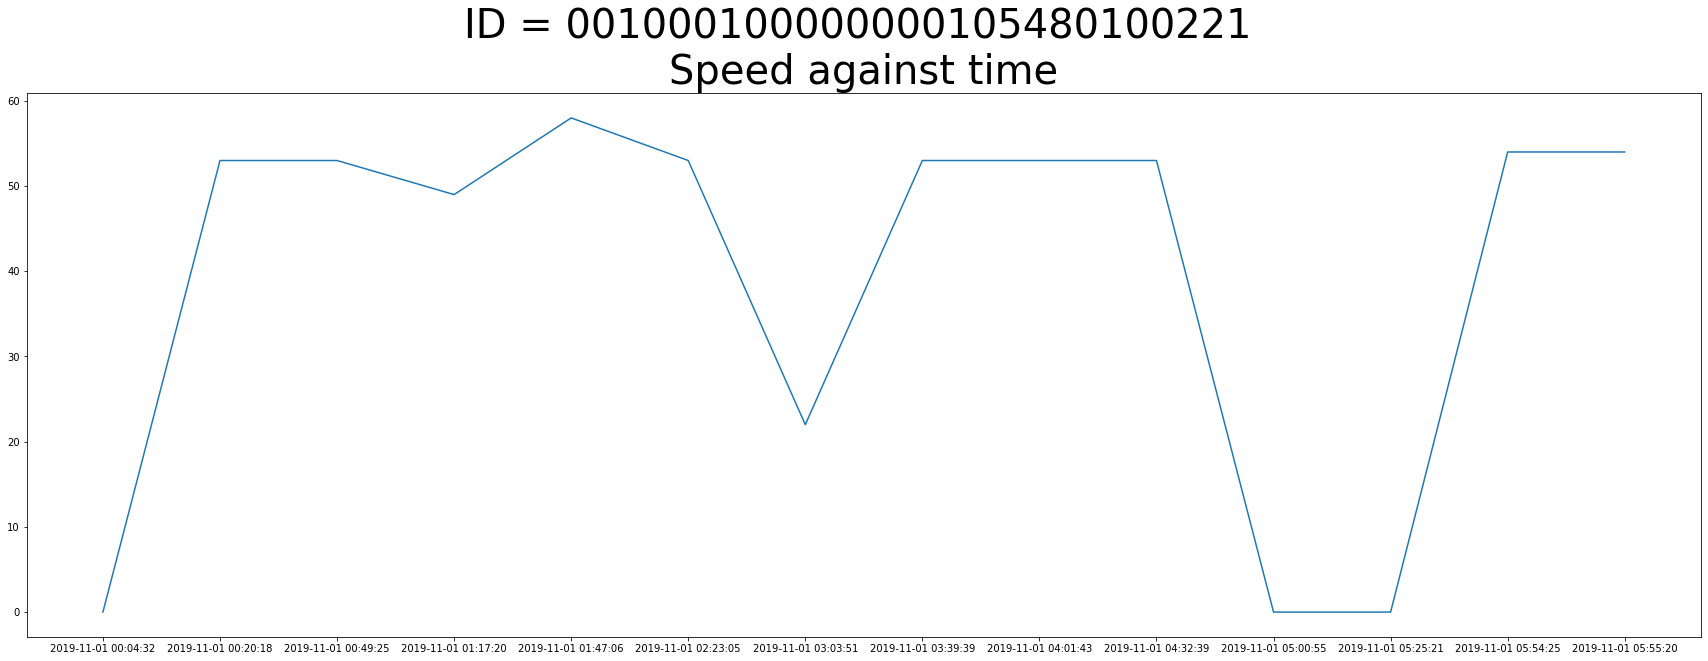

In [396]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.plot([str(i) for i in sample['time_stamp'][0]],sample['speed'][0])
plt.title('ID = 001000100000000105480100221 \nSpeed against time',size=40)

Text(0.5, 1.0, 'ID = 001000100000000110800112216 \nSpeed against time')

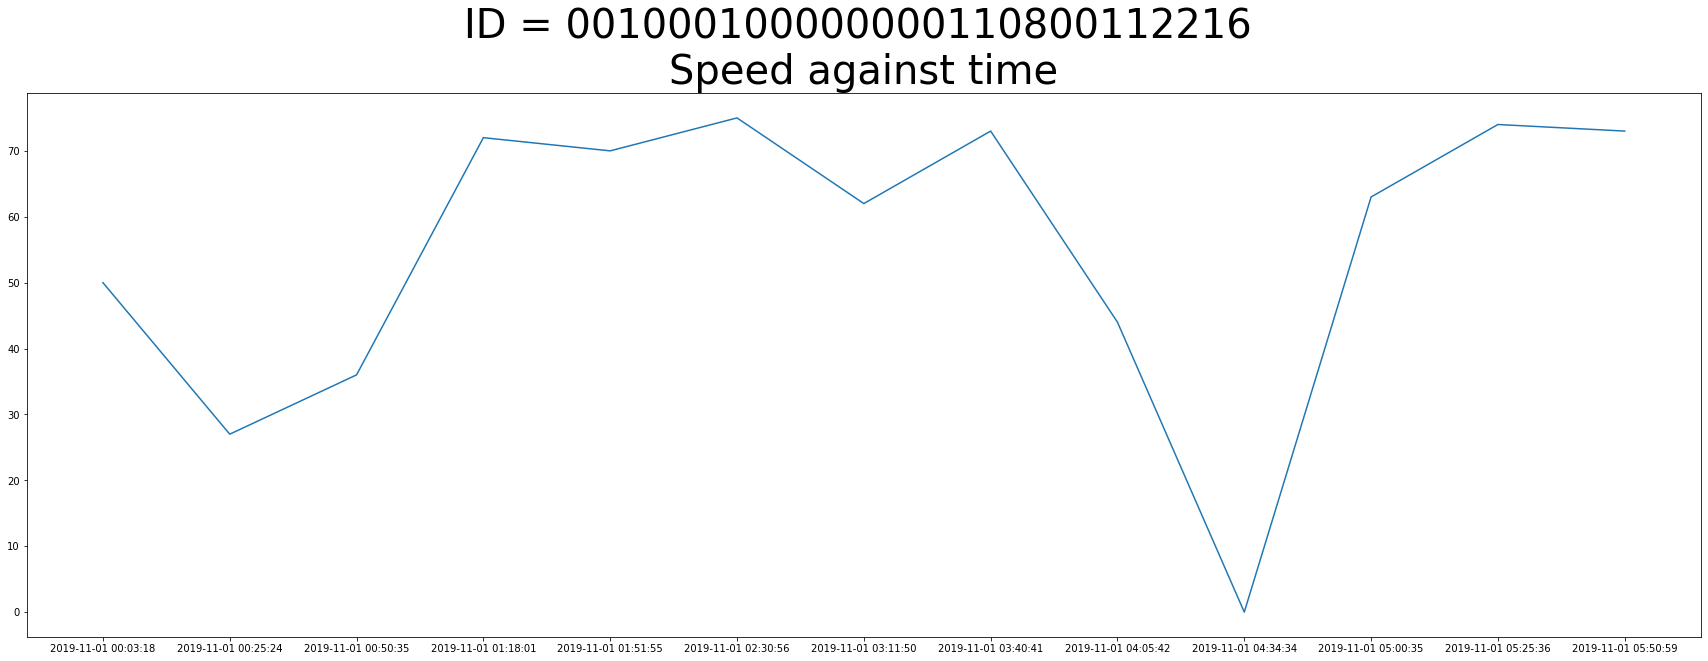

In [397]:
plt.figure(figsize=(30,10))
plt.plot([str(i) for i in sample1['time_stamp'][1]],sample1['speed'][1])
plt.title('ID = 001000100000000110800112216 \nSpeed against time',size=40)

In [398]:
print(sample1['geohash'][1][7])

map= folium.Map(location=['13.7','100.7'],
                        zoom_start=10,
                        tiles='Stamen Terrain')
folium.Marker(location=['13.7','100.7'],popup = 'name',).add_to(map) 
map

13.7-100.7


In [399]:
folium_map = folium.Map(location=['13.8','100.5'],
                        zoom_start=14,
                        tiles='Stamen Terrain')
for loc in sample['geohash'][0]:
    loc = loc.split('-')
    
    
    folium_map.add_child(folium.Marker(location=loc,
                                   popup='None'))
    
route = [(sample['geohash'][0][0]),(sample['geohash'][0][-1])]    

# folium.PolyLine(loc,
#                 color='red',
#                 weight=15,
#                 opacity=0.8).add_to(folium_map)

In [400]:
folium_map